# Magritte - inclusion of unsupervised scratch book
<p>Notebook used for working on features to include unsupervised into magritte pipeline
</p>

# Initialize environment

When doing magritte dev work, I am currently using two repos:
- magritte (for core code changes)
- magritte scratch (for scratch notebooks for development work)

Configs below are setup so that you checkout both repos in parallel directories
    

In [1]:
import sys
import os

MAGRITTE_SCRATCH_DIR = f'{os.getcwd()}' # assume notebook is in root of magritte scratch dir
MAGRITTE_DIR = f'{os.getcwd()}/../magritte'
UTILITIES_DIR = f'{MAGRITTE_DIR}/utilities'
DEMO_DATA_DIR = f'{MAGRITTE_DIR}/data'
DEMO_DATA_FILE = f'{DEMO_DATA_DIR}/IMDB Dataset.csv.gz'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd
import numpy as np

# Load Data
<p>Loading the IMDB Dataset<br>
50,000 records on pos/neg sentiment analysis<br>
25,000 records per class<br>

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_csv(DEMO_DATA_FILE, compression='gzip')

# Changing target column from string to 0,1. Label encoding not yet included in framework
ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

print(f'Data shape: {ORIG_DF.shape}')
display(ORIG_DF.head())

Data shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=False, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = None, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=True,  # replace all numbers with a special token
                    no_digits=True,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=False,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="",
                    replace_with_digit="",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=100 # Currently only used in TFIDF
                    )

# Data Package
<p>#TODO: Needs description of what this file is</p>

In [6]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)

# Experiment Manager

In [7]:
from ExperimentManager import ExperimentManager

In [8]:
from xgboost import XGBClassifier
untrained_model_1 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=5,
                           n_estimators=100)

In [9]:
myEM = ExperimentManager(project_name='NLPipe',
                         experiment_name='XGB depth:5 est:100',
                         experiment_method='supervised',
                         untrained_model=untrained_model_1,
                         data_package=myDP)

                         

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:5 est:100
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, import

In [10]:
myEM.list_experiments()

idx Processed Experiment name
  0     False XGB depth:5 est:100


# ExperimentManager - add/list/remove

In [11]:
from sklearn.cluster import KMeans
untrained_model_2 = KMeans(n_clusters=2, random_state=765)
myEM.add_experiment(experiment_name='KMeans n=2',
                    experiment_method='unsupervised',
                    untrained_model=untrained_model_2)

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: KMeans n=2
---> experimentMethod: unsupervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
KMeans(n_clusters=2, random_state=765)



In [12]:
myEM.list_experiments()

idx Processed Experiment name
  0     False XGB depth:5 est:100
  1     False KMeans n=2


In [13]:
myEM.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:5 est:100
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, import

# ExperimentManager - run_experiment

In [14]:
myEM.list_experiments()

idx Processed Experiment name
  0     False XGB depth:5 est:100
  1     False KMeans n=2


Data package has not been processed. Processing now.
---------------------------------------------------------------------------
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Processing data package with provided parameters


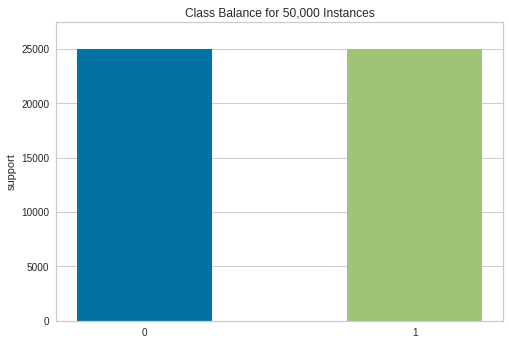

Undersampling data to match min class: 0 of size: 25000


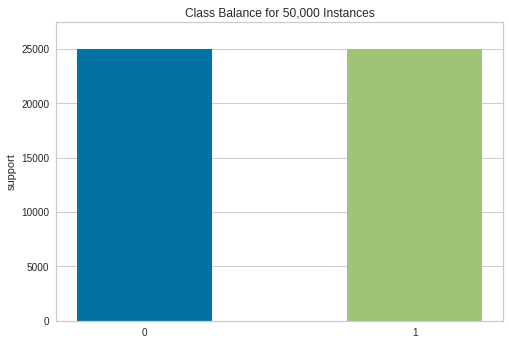

,sentiment,ttlCol
0,0,25000
1,1,25000


Cleaning text column...


100%|███████████████████████████████████| 50000/50000 [00:21<00:00, 2332.23it/s]
[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|███████████████████████████████████| 50000/50000 [00:09<00:00, 5358.04it/s]



Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['acting', 'actors', 'actually', 'all', 'also', 'and', 'another', 'around', 'back', 'bad', 'best', 'better', 'big', 'br', 'can', 'cast', 'character', 'characters', 'could', 'director', 'end', 'even', 'ever', 'every', 'film', 'films', 'find', 'first', 'funny', 'get', 'go', 'going', 'good', 'got', 'great', 'he', 'horror', 'however', 'in', 'it', 'know', 'life', 'like', 'little', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'movie', 'movies', 'much', 'never', 'new', 'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty', 'quite', 'real', 'really', 'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still', 'story', 'take', 'that', 'the', 'there', 'thing', 'things', 'think', 'this', 'though', 'time', 'two', 'us', 've', 'want', 'watch', 'watching', 'way', 'well', 'work', 'world', 'would', 'years', 'young']

Completed train/test split (train_size = 0.8):
---> Original data si

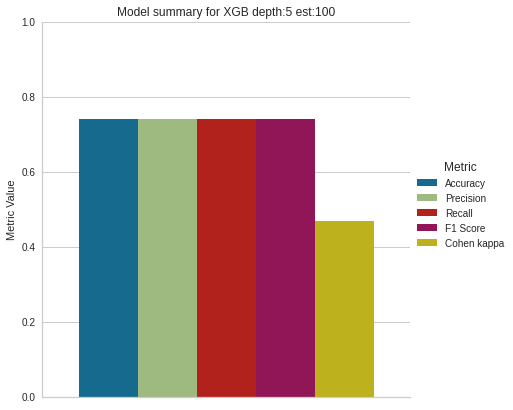

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.74       0.74    0.74      0.74         0.47


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [1] KMeans n=2

Training model for KMeans n=2. Completed. Wall time[h:m:s]: 00:00:01
Predicting model for KMeans n=2. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


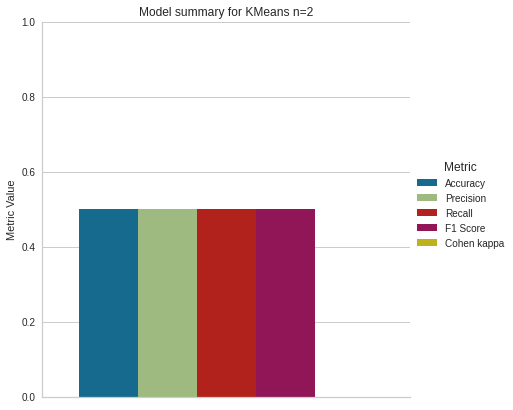

   Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  KMeans n=2       0.5        0.5     0.5       0.5         -0.0


Completed. Wall time[h:m:s]: 00:00:01


Processing complete. Displaying model comparison


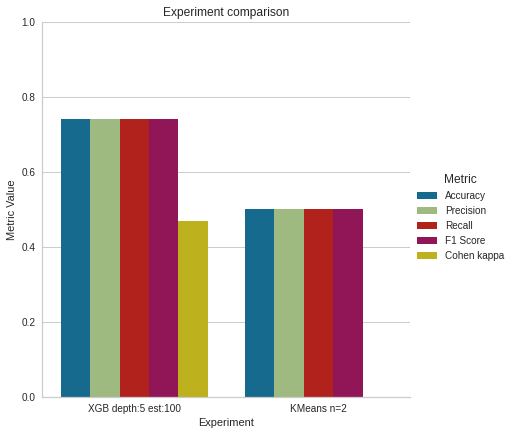

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.74       0.74    0.74      0.74         0.47
1           KMeans n=2      0.50       0.50    0.50      0.50        -0.00

Processing experiments complete. Wall time[h:m:s]: 00:00:36


In [15]:
axis_labels = [0,1] #This won't be needed once the label encoder has been included
myEM.run_experiment(axis_labels=axis_labels,
                    n_jobs=-1,  # -1 means use all available processors, otherwise include number
                    index=None) # index=None means process all experiements, 
                                # otherwise provide index of single experiment to run

# Scratchpad

In [ ]:
myEM.display_experiment_summary(index=1, axisLabels=axis_labels)

In [ ]:
def check_input(testInput):
    valid_methods = ['supervised', 'unsupervised']
    isOk = False
    e_message = ''

    for x in valid_methods:
        if x == testInput:
            isOk = True

        if not isOk:
            e_message = f'Invalid method submitted.'

    try:
        assert(isOk is True)
    except AssertionError as e:
        e.args += (e_message, f'Use: {", ".join(valid_methods)}')
        raise

In [ ]:
check_input('supervised')

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
id_var, value_vars, df = myEM.experiments[1].getModelStats_Frame(exp_label='test label')

In [ ]:
def show_model_summary(data_frame,
                       id_var,
                       value_vars):
    value_name = 'value_name'
    var_name = 'Metric'

    tDF = pd.melt(data_frame,
                  id_vars=id_var,
                  value_vars=value_vars,
                  var_name=var_name,
                  value_name=value_name
                  )

    plt.close();
    
    #plt.figure(figsize=(10, 10) )
    #fig, ax = plt.subplots(figsize=(10,10))
    gfg = sns.catplot(x=id_var,
                       y=value_name,
                       hue=var_name,
                       data=tDF,
                       kind='bar',
                       height=6,
                       aspect=1) 
    
  
    gfg.set(ylim=(0, 1))
    gfg.set( xlabel = "Experiment", ylabel = "Metric Value", title='Model Comparison')
    plt.show()
    
    print(data_frame.head())


In [ ]:
show_model_summary(data_frame=df,
                   id_var=id_var,
                   value_vars=value_vars)

In [ ]:
sns.set_style("whitegrid")
 
# assign dataset
tips = sns.load_dataset("tips")
 
# depict visualization
gfg = sns.boxplot(x="day", y="total_bill",
                  data=tips)
_ = gfg.set_ylim(0, 80)

In [ ]:
import time
time.strftime('%H:%M:%S', time.gmtime(60))
